# Function gshow

## Synopse

Overlay color planes on a gray scale image ready for display.

- **g = gshow(f, X1, X2, X3, X4, X5, X6)**
    - **g:** Output. RGB Image.
    - **f:** Image. Gray Scale input image.
    - **X1:** binary image. Overlay as Red.
    - **X2:** binary image. Overlay as Green.
    - **X3:** binary image. Overlay as Blue.
    - **X4:** binary image. Overlay as Magenta.
    - **X5:** binary image. Overlay as Yellow.
    - **X6:** binary image. Overlay as Cyan.

In [1]:
import numpy as np

def gshow(f, X1=None, X2=None, X3=None, X4=None, X5=None, X6=None):
    
    if f.dtype == np.bool:
        f = np.where(f,255,0).astype('uint8')
    
    r = f
    g = f
    b = f
    
    if X1 is not None: # red 1 0 0
        if (X1.dtype != np.bool): 
            raise Exception('X1 must be binary overlay')
        r = np.where(X1,255,r)
        g = np.where(~X1,g,0)
        b = np.where(~X1,b,0)
    if X2 is not None: # green 0 1 0
        if (X2.dtype != np.bool):
            raise Exception('X2 must be binary overlay')
        r = np.where(~X2,r,0)
        g = np.where(X2,255,g)
        b = np.where(~X2,b,0)
    if X3 is not None: # blue 0 0 1
        if (X3.dtype != np.bool):
            raise Exception('X3 must be binary overlay')
        r = np.where(~X3,r,0)
        g = np.where(~X3,g,0)
        b = np.where(X3,255,b)
    if X4 is not None: # magenta 1 0 1
        if (X4.dtype != np.bool):
            raise Exception('X4 must be binary overlay')
        r = np.where(X4,255,r)
        g = np.where(~X4,g,0)
        b = np.where(X4,255,b)
    if X5 is not None: # yellow 1 1 0
        if (X5.dtype != np.bool):
            raise Exception('X5 must be binary overlay')
        r = np.where(X5,255,r)
        g = np.where(X5,255,g)
        b = np.where(~X5,b,0)
    if X6 is not None: # cyan 0 1 1
        if (X6.dtype != np.bool):
            raise Exception('X6 must be binary overlay')
        r = np.where(~X6,r,0)
        g = np.where(X6,255,g)
        b = np.where(X6,255,b)
        
    return np.array([r,g,b])

## Description

Creates a RGB image from the input grayscale image f, overlayed by optional binary planes, each one with a different color. This function is useful to display results of segmentation or when one wants to highlight a particular region of the image.

## Examples

In [1]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python gshow.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia
    
    import matplotlib.image as mpimg

[NbConvertApp] Converting notebook gshow.ipynb to python
[NbConvertApp] Writing 4071 bytes to gshow.py


### Numerical example

In [2]:
if testing:
    f = np.arange(25).reshape(5,5)

    print('f: \n',f)
    print('\nf>20: \n',f>20)

    print('\ngshow(f,f>20) \n',ia.gshow(f,f>20))

f: 
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]

f>20: 
 [[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False  True  True  True  True]]

gshow(f,f>20) 
 [[[  0   1   2   3   4]
  [  5   6   7   8   9]
  [ 10  11  12  13  14]
  [ 15  16  17  18  19]
  [ 20 255 255 255 255]]

 [[  0   1   2   3   4]
  [  5   6   7   8   9]
  [ 10  11  12  13  14]
  [ 15  16  17  18  19]
  [ 20   0   0   0   0]]

 [[  0   1   2   3   4]
  [  5   6   7   8   9]
  [ 10  11  12  13  14]
  [ 15  16  17  18  19]
  [ 20   0   0   0   0]]]


### Image examples

""
Original image
""
Pixels with values above 230 are shown in red

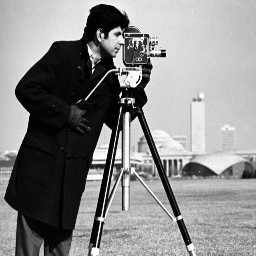
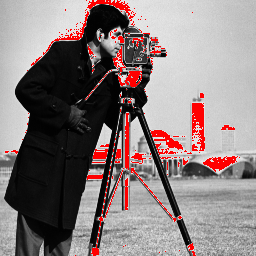

In [3]:
if testing:
    f = mpimg.imread('../data/cameraman.tif')

    g = ia.gshow(f, f>230)
    
    nb = ia.nbshow(2)
    nb.nbshow(f,'Original image')
    nb.nbshow(g,'Pixels with values above 230 are shown in red')
    nb.nbshow()

""
Original image
""
Overlaid image

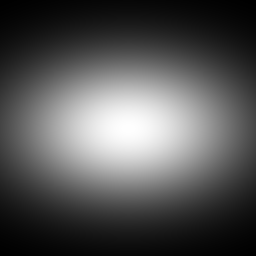
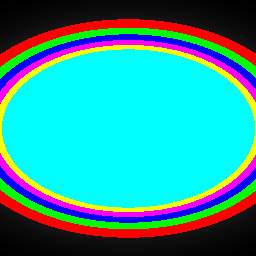

In [4]:
if testing:
    f = ia.gaussian((256,256), np.transpose([[128,128]]), [[50*50,0],[0,80*80]])
    fn = ia.normalize(f, [0,255])
    
    f1 = ia.gshow(fn, fn > 20, fn > 30, fn > 40, fn > 50, fn > 60, fn > 70)
    
    nb = ia.nbshow(2)
    nb.nbshow(fn,'Original image')
    nb.nbshow(f1,'Overlaid image')
    nb.nbshow()

## Reference

- [Function iagshow](http://adessowiki.fee.unicamp.br/adesso/wiki/ia636/iagshow/view/)

## Contributions

- Tiago Dezotti, 1. sem 2017.